In [26]:
import os
from os.path import expanduser
import socket
import sys
import glob

# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
if running_system == systemLOCAL:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"Documents","projects", "pyfesom")
elif running_system[0:1] == "b" or running_system == systemHLRN:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"pyfesom")
else:
    print 'please configure your local machine : type socket.gethostname()'
print "working directory set to", wd_path
os.chdir(wd_path)
sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append("pyfesom") # add standard 's modules
#########################################

computer =  bfn1001
working directory set to /home/hbkoziel/pyfesom


In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from pylab import *
import pyfesom as pf
#from load_mesh_data_new import *
import numpy as np
import datetime as dt
from PiecewiseNorm import PiecewiseNorm
from netCDF4 import Dataset
import cmocean as cmaps
#from matplotlib.colors import ListedColormap

In [28]:
# PLOT CONFIGURATION #

# load colormaps #
cmap = cmaps.cm.balance
# figure export 
export_plot = True
# figure export definition
dpicnt=150
# choose simulation
runid='Arc12'
# choose date
first_year = 1980
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
months =np.linspace(0,11,12).astype(int)
# choose depth
get3d = False
# load the given biological tracer #
var_id= 'area'

########################

# AUTOMATIC DEFINITION OF PATHS
resultpath = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/Oldfiles/'
savepath    = wd_path+'/figures/'+runid+'/'
meshpath    = wd_path+'/data/mesh/meshArc4.5/'
outputpath = '/scratch/usr/hbkoziel/Arc12/'

# Create figure directory if it does not exist
if os.path.exists(savepath) == False:
    try:
        os.mkdir(savepath)
        print ("Creation of the directory %s successfull" % savepath)
    except OSError:
        print ("Creation of the directory %s failed" % savepath)
else:
    print ("directory %s already existing" % savepath)

directory /home/hbkoziel/pyfesom/figures/Arc12/ already existing


In [29]:
mesh = pf.load_mesh(meshpath, usepickle=True,get3d=get3d)
#mesh = fesom_mesh(meshpath, get3d = get3d)
#mesh = load_mesh(meshpath)

/home/hbkoziel/pyfesom/data/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /home/hbkoziel/pyfesom/data/mesh/meshArc4.5/pickle_mesh


In [30]:
mesh


FESOM mesh:
path                  = /gfs2/work/hbkvsk12/mesh/meshArc4.5
alpha, beta, gamma    = 50, 15, -90
number of 2d nodes    = 753179
number of 2d elements = 1480268
number of 3d nodes    = 16950142

        

In [31]:
ncfile      = meshpath+'Arc4.5.initial.mesh.diag.nc'
f           = Dataset(ncfile, 'r')
NodalAreaModel = f.variables['cluster_area'][:]

In [32]:
#X = genfromtxt(outputpath+'ICE_APR_1990_2015_trend.csv', delimiter=';')
mo=6
if mo ==4: 
    dayind = (range(45,59))
    month='APR'
elif mo ==5: 
    dayind = (range(60,74))
    month='MAY'
elif mo ==6: 
    dayind = (range(75,89))
    month='JUN'
elif mo ==7: 
    dayind = (range(90,105))
    month='JUL'
elif mo ==8:
    dayind = (range(106,120))
    month='AUG'
elif mo ==9: 
    dayind = (range(121,135))
    month='SEP'
    
# initlialyze
ICECON = np.zeros((len(years),len(mesh.x2)))
ICEAREA = np.zeros((len(years),len(mesh.x2)))

# loop over years
for ind in range(0,len(years)):
     print years[ind]
     ncfile = resultpath+runid+'.'+str(years[ind])+'.ice.mean.nc'
     #print ncfile
     f      = Dataset(ncfile, 'r')
     if years[ind]<2000:
         ice    = f.variables[var_id][mo,0:mesh.n2d]
     else:
         ice    = f.variables[var_id][dayind,0:mesh.n2d].sum(axis=0)
         ice    = ice / len(dayind)
     arcsurf_ind = np.nonzero((mesh.y2>66.) & (ice>0.1))
     ICEAREA[ind,:]=np.sum(NodalAreaModel[arcsurf_ind])
     ICECON[ind,:] = ice

data2 = ICECON.mean(axis=0)
print 'Number of nans in tracer: ',np.count_nonzero(np.isnan(data2))
print 'Number of inf in tracer: ',np.count_nonzero(np.isinf(data2))
print 'Mean of surface: ',np.mean(data2[0:len(mesh.x2)])
print 'Max and min: ',np.max(data2),np.min(data2)

1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
Number of nans in tracer:  0
Number of inf in tracer:  0
Mean of surface:  0.48076930499
Max and min:  0.999800629086 0.0


(753179,)
(36,)


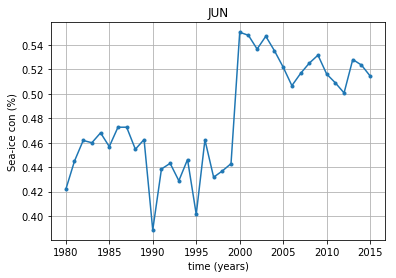

In [33]:
icecon=ICECON.mean(axis=1)
print data2.shape
print icecon.shape
plt.plot(years,icecon,'.-')
plt.grid(True)
plt.xlabel('time (years)')
plt.ylabel('Sea-ice con (%)')
plt.title(month)
plt.savefig(savepath+'sertemp/SEAICECON_trend_'+str(first_year)+'_'+str(last_year)+'.png', dpi = dpicnt, bbox_inches='tight') 
     

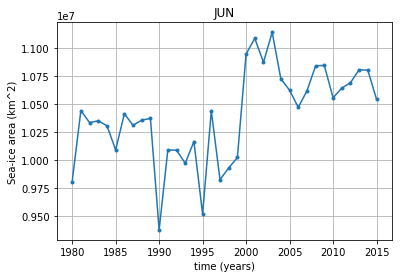

In [34]:
icearea=ICEAREA.mean(axis=1)/1e6
plt.plot(years,icearea,'.-')
plt.grid(True)
plt.xlabel('time (years)')
plt.ylabel('Sea-ice area (km^2)')
plt.title(month)
plt.savefig(savepath+'sertemp/SEAICEAREA_trend_'+str(first_year)+'_'+str(last_year)+'.png', dpi = dpicnt, bbox_inches='tight') 
     